# Сегментация клиентской базы телекоммуникационной компании

**Аналитическая задача** — провести анализ данных с целью выделения наиболее типичных групп клиентов и разработки предложений для каждой из групп.

## Описание данных
Каждый клиент описывается следующим набором признаков:
- `Код`, `Возраст`, `Среднемесячный расход`, `Средняя продолжительность разговоров`, `Звонков днем за месяц`, `Звонков вечером за месяц`, `Звонков ночью за месяц`, `Звонки в другие города`, `Звонки в другие страны`, `Доля звонков на стационарные телефоны`, `Количество SMS за месяц`.

## Примерный план по выполнению проекта

**Шаг 1.** Загрузка данных;

**Шаг 2.** Первичная обработка данных (при необходимости):
- скорректировать заголовки;
- скорректировать типы признаков;
- проверить наличие дублирующихся записей;
- проверить наличие аномальных значений;
- восстановить пропущенные значения;

**Шаг 3.** Провести исследовательский анализ данных:
- исследовать распределения признаков;
- исследовать возможные зависимости между признаками;

**Шаг 4.** Провести сегментацию клиентов методами кластерного анализа:
- провести кластеризацию данных;
- исследовать качество полученного разбиения;
- по возможности использовать другие методики сегментации клиентов (RFM-анализ);
- дать содержательную интерпретацию получившимся группам;
- выработать рекомендации по каждой из групп;

**Шаг 5.** Проверить гипотезы по группам
- сформулировать и проверить гипотезы о равенстве значений показателей по получившимся группам.  

# Подключение библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Загрузка данных

In [2]:
df = pd.read_csv('mobile.txt', 
                 delimiter = '\t', 
                 encoding = 'cp1251')
df

,Код,Возраст,Среднемесячный расход,Средняя продолжительность разговоров,Звонков днем за месяц,Звонков вечером за месяц,Звонков ночью за месяц,Звонки в другие города,Звонки в другие страны,Доля звонков на стационарные телефоны,Количество SMS за месяц
0,0,24,121.54,2.4,12,65,5,0,0,5,56
1,1,51,287.51,1.7,111,109,1,44,0,6,1
2,2,41,113.70,2.1,41,27,0,0,0,1,36
3,3,35,410.23,5.6,47,49,0,0,0,11,23
4,4,26,537.60,4.8,58,77,4,0,0,16,29
...,...,...,...,...,...,...,...,...,...,...,...
4487,4586,40,186.20,3.7,36,28,2,6,0,12,30
4488,4587,40,500.68,6.0,46,66,0,6,0,15,23
4489,4588,60,470.42,3.5,58,129,2,4,0,19,5
4490,4589,38,858.99,9.3,50,74,0,0,0,28,69


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4492 entries, 0 to 4491
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Код                                    4492 non-null   int64  
 1   Возраст                                4492 non-null   int64  
 2   Среднемесячный расход                  4492 non-null   float64
 3   Средняя продолжительность разговоров   4492 non-null   float64
 4   Звонков днем за месяц                  4492 non-null   int64  
 5   Звонков вечером за месяц               4492 non-null   int64  
 6   Звонков ночью за месяц                 4492 non-null   int64  
 7   Звонки в другие города                 4492 non-null   int64  
 8   Звонки в другие страны                 4492 non-null   int64  
 9   Доля звонков на стационарные телефоны  4492 non-null   int64  
 10  Количество SMS за месяц                4492 non-null   int64  
dtypes: f

In [4]:
perc = [0.01, 0.05, 0.25, 0.5, 0.75, 0.8, 0.95, 0.99]
df.describe(percentiles=perc)

,Код,Возраст,Среднемесячный расход,Средняя продолжительность разговоров,Звонков днем за месяц,Звонков вечером за месяц,Звонков ночью за месяц,Звонки в другие города,Звонки в другие страны,Доля звонков на стационарные телефоны,Количество SMS за месяц
count,4492.000000,4492.000000,4492.000000,4492.000000,4492.000000,4492.000000,4492.000000,4492.000000,4492.000000,4492.000000,4492.000000
mean,2294.630677,41.894924,506.155512,4.227571,63.859751,70.347729,6.273152,8.661175,0.394034,10.331701,21.243321
std,1325.224451,13.077254,646.252023,3.002179,62.773427,41.222023,14.713034,13.478042,1.171980,9.222693,27.911864
min,0.000000,19.000000,3.180000,0.100000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,44.910000,19.000000,7.797300,0.400000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,228.550000,20.000000,16.915500,1.100000,5.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1147.750000,31.000000,152.880000,2.075000,37.000000,42.000000,0.000000,0.000000,0.000000,3.000000,3.000000
50%,2297.500000,43.000000,316.960000,3.300000,53.000000,71.000000,1.000000,2.000000,0.000000,8.000000,6.000000
75%,3443.250000,52.000000,600.032500,5.900000,68.000000,98.000000,5.000000,12.000000,0.000000,16.000000,32.000000
80%,3668.800000,54.000000,702.536000,6.500000,74.000000,106.000000,6.000000,20.000000,0.000000,18.000000,39.000000


In [5]:
df.isna().sum()

Код                                      0
Возраст                                  0
Среднемесячный расход                    0
Средняя продолжительность разговоров     0
Звонков днем за месяц                    0
Звонков вечером за месяц                 0
Звонков ночью за месяц                   0
Звонки в другие города                   0
Звонки в другие страны                   0
Доля звонков на стационарные телефоны    0
Количество SMS за месяц                  0
dtype: int64

In [6]:
print(df.duplicated().sum())
print(df.drop(columns='Код').duplicated().sum())

0
0


**Вывод**: данные загружены корректно, по отдельным признакам имеются пропуски, для нескольких признаков требуется преобразование типов. Столбцы `Код` и `Звонки в другие страны` можно удалить из дальнейшего рассмотрения.

# Первичная обработка данных

## Удаление столбцов

In [7]:
df.drop(columns = ['Код'], 
        inplace = True)

## Корректировка заголовков

In [8]:
df.columns

Index(['Возраст', 'Среднемесячный расход',
       'Средняя продолжительность разговоров', 'Звонков днем за месяц',
       'Звонков вечером за месяц', 'Звонков ночью за месяц',
       'Звонки в другие города', 'Звонки в другие страны',
       'Доля звонков на стационарные телефоны', 'Количество SMS за месяц'],
      dtype='object')

In [9]:
dict_rename_columns = {
'Возраст' : 'age', 
'Среднемесячный расход' : 'average_monthly_expense',
'Средняя продолжительность разговоров' : 'average_call_duration', 
'Звонков днем за месяц' : 'calls_day_month',
'Звонков вечером за месяц' : 'calls_evening_month', 
'Звонков ночью за месяц' : 'calls_night_month',
'Звонки в другие города' : 'calls_other_cities', 
'Доля звонков на стационарные телефоны' : 'percentage_calls_telephone', 
'Количество SMS за месяц' : 'number_sms_month',
'Звонки в другие страны': 'calls_other_countries'}

In [10]:
df.rename(columns = dict_rename_columns, 
          inplace = True)
df.columns

Index(['age', 'average_monthly_expense', 'average_call_duration',
       'calls_day_month', 'calls_evening_month', 'calls_night_month',
       'calls_other_cities', 'calls_other_countries',
       'percentage_calls_telephone', 'number_sms_month'],
      dtype='object')

## Преобразование типов

In [11]:
df['calls_night_month'] = df['calls_night_month'].replace("'7'",7).astype('int')
df['calls_other_cities'] = df['calls_other_cities'].replace({"'29'":29, "'0'":0}).astype('int')
df['percentage_calls_telephone'] = df['percentage_calls_telephone'].replace("'2'",2).astype('int')
df['number_sms_month'] = df['number_sms_month'].replace("'12'",12).astype('int')


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4492 entries, 0 to 4491
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         4492 non-null   int64  
 1   average_monthly_expense     4492 non-null   float64
 2   average_call_duration       4492 non-null   float64
 3   calls_day_month             4492 non-null   int64  
 4   calls_evening_month         4492 non-null   int64  
 5   calls_night_month           4492 non-null   int32  
 6   calls_other_cities          4492 non-null   int32  
 7   calls_other_countries       4492 non-null   int64  
 8   percentage_calls_telephone  4492 non-null   int32  
 9   number_sms_month            4492 non-null   int32  
dtypes: float64(2), int32(4), int64(4)
memory usage: 280.9 KB


## Работа с пропущенными значениями

In [13]:
old_row_count = df.shape[0]
df.dropna(inplace = True)
new_row_count = df.shape[0]
print('Удалено {:.2%} данных'.format((old_row_count - new_row_count)/old_row_count))

Удалено 0.00% данных


**Вывод**

# Разведочный анализ данных 

In [14]:
def calc_wisk(col):
    Q1, median, Q3 = np.percentile(np.asarray(df[col]), [25, 50, 75])
    IQR = Q3 - Q1
    loval = Q1 - 1.5 * IQR
    hival = Q3 + 1.5 * IQR
    wiskhi = np.compress(np.asarray(df[col]) <= hival, np.asarray(df[col]))
    wisklo = np.compress(np.asarray(df[col]) >= loval, np.asarray(df[col]))
    actual_hival = np.max(wiskhi)
    actual_loval = np.min(wisklo)
    return actual_loval, actual_hival

## Исследование признака `age`

## Исследование признака `average_monthly_expense`  

## Исследование признака `average_call_duration`

## Исследование признака `calls_day_month`

## Исследование признака `calls_evening_month`

## Исследование признака `calls_night_month`

## Исследование признака `calls_other_cities`

## Исследование признака `calls_other_countries`

## Исследование признака `percentage_calls_telephone`

## Исследование признака `number_sms_month`

## Исследование все признаков

In [15]:
dict_rename_columns.keys()

dict_keys(['Возраст', 'Среднемесячный расход', 'Средняя продолжительность разговоров', 'Звонков днем за месяц', 'Звонков вечером за месяц', 'Звонков ночью за месяц', 'Звонки в другие города', 'Доля звонков на стационарные телефоны', 'Количество SMS за месяц', 'Звонки в другие страны'])

In [16]:
dict_label = dict(zip(dict_rename_columns.values(), dict_rename_columns.keys()))
dict_label

{'age': 'Возраст',
 'average_monthly_expense': 'Среднемесячный расход',
 'average_call_duration': 'Средняя продолжительность разговоров',
 'calls_day_month': 'Звонков днем за месяц',
 'calls_evening_month': 'Звонков вечером за месяц',
 'calls_night_month': 'Звонков ночью за месяц',
 'calls_other_cities': 'Звонки в другие города',
 'percentage_calls_telephone': 'Доля звонков на стационарные телефоны',
 'number_sms_month': 'Количество SMS за месяц',
 'calls_other_countries': 'Звонки в другие страны'}

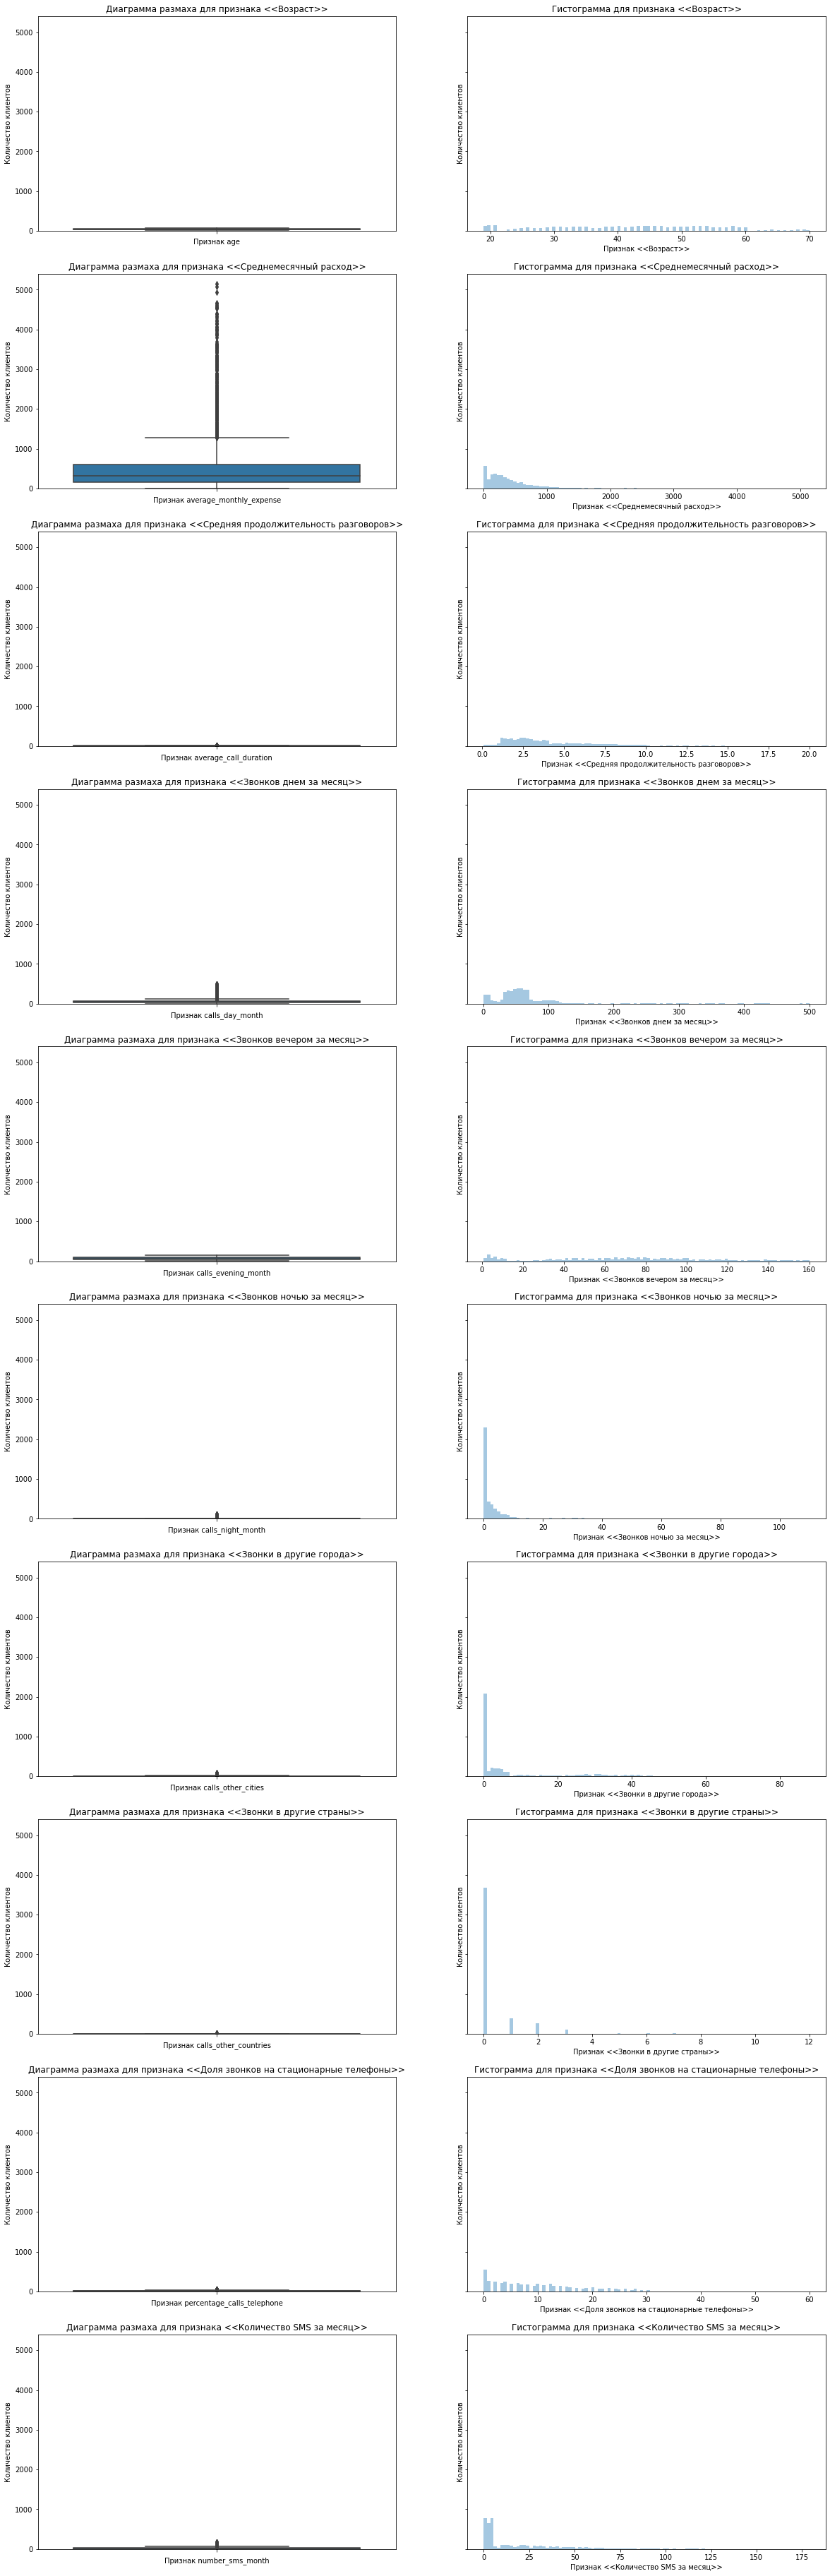

In [17]:
fig, axes = plt.subplots(10,2, sharey=True, figsize=(20,66))
i=0
j = 1
for i, col in enumerate(df.columns):
    plt.subplot(10,2,j)
    ax = sns.boxplot(y = df[col])
    ax.set_ylabel('Количество клиентов')
    ax.set_xlabel('Признак {}'.format(col))
    ax.set_title('Диаграмма размаха для признака <<{}>>'.format(dict_label[col]))
    plt.subplot(10,2,j+1)
    ax = sns.distplot(x = df[col], kde = False, bins = 100)
    ax.set_ylabel('Количество клиентов')
    ax.set_xlabel('Признак <<{}>>'.format(dict_label[col]))
    ax.set_title('Гистограмма для признака <<{}>>'.format(dict_label[col])) 
    j+=2     

### Расчет границ признаков по диаграмме размаха

In [18]:
lst_tuple_wisk = list()
lst_min = list()
lst_max = list()
for col in df.columns:
    Q1, median, Q3 = np.percentile(np.asarray(df[col]), [25, 50, 75])
    IQR = Q3 - Q1
    loval = Q1 - 1.5 * IQR
    hival = Q3 + 1.5 * IQR
    wiskhi = np.compress(np.asarray(df[col]) <= hival, np.asarray(df[col]))
    wisklo = np.compress(np.asarray(df[col]) >= loval, np.asarray(df[col]))
    actual_hival = np.max(wiskhi)
    actual_loval = np.min(wisklo)
    lst_tuple_wisk.append((actual_loval, actual_hival))
    lst_min.append(df[df[col] < actual_loval].shape[0])
    lst_max.append(df[df[col] > actual_loval].shape[0])
#actual_loval, actual_hival

In [19]:
dict_to_df = {'wisk': lst_tuple_wisk,
              'count_small_an' : lst_min,
              'count_big_an' : lst_max
              }
dict_to_df

{'wisk': [(19, 70),
  (3.18, 1270.16),
  (0.1, 11.6),
  (1, 114),
  (1, 160),
  (0, 12),
  (0, 30),
  (0, 0),
  (0, 35),
  (0, 75)],
 'count_small_an': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'count_big_an': [4358, 4491, 4473, 4476, 4467, 2389, 2413, 823, 3935, 3998]}

In [20]:
df_temp = pd.DataFrame(data = dict_to_df, 
                     index = dict_label.values())
df_temp

,wisk,count_small_an,count_big_an
Возраст,"(19, 70)",0,4358
Среднемесячный расход,"(3.18, 1270.16)",0,4491
Средняя продолжительность разговоров,"(0.1, 11.6)",0,4473
Звонков днем за месяц,"(1, 114)",0,4476
Звонков вечером за месяц,"(1, 160)",0,4467
Звонков ночью за месяц,"(0, 12)",0,2389
Звонки в другие города,"(0, 30)",0,2413
Доля звонков на стационарные телефоны,"(0, 0)",0,823
Количество SMS за месяц,"(0, 35)",0,3935
Звонки в другие страны,"(0, 75)",0,3998


### Расчет описательных статистик

In [21]:
p_table =  df.agg(['mean', 'median', 'min', 'max']).T
p_table.index = dict_label.values()

### Итоговый отчет

In [22]:
p_table.merge(df_temp, 
              left_index = True, 
              right_index = True)

,mean,median,min,max,wisk,count_small_an,count_big_an
Возраст,41.894924,43.00,19.00,70.00,"(19, 70)",0,4358
Среднемесячный расход,506.155512,316.96,3.18,5142.76,"(3.18, 1270.16)",0,4491
Средняя продолжительность разговоров,4.227571,3.30,0.10,20.00,"(0.1, 11.6)",0,4473
Звонков днем за месяц,63.859751,53.00,1.00,500.00,"(1, 114)",0,4476
Звонков вечером за месяц,70.347729,71.00,1.00,160.00,"(1, 160)",0,4467
Звонков ночью за месяц,6.273152,1.00,0.00,110.00,"(0, 12)",0,2389
Звонки в другие города,8.661175,2.00,0.00,88.00,"(0, 30)",0,2413
Доля звонков на стационарные телефоны,0.394034,0.00,0.00,12.00,"(0, 0)",0,823
Количество SMS за месяц,10.331701,8.00,0.00,60.00,"(0, 35)",0,3935
Звонки в другие страны,21.243321,6.00,0.00,179.00,"(0, 75)",0,3998


### Диаграммы парных сравнений

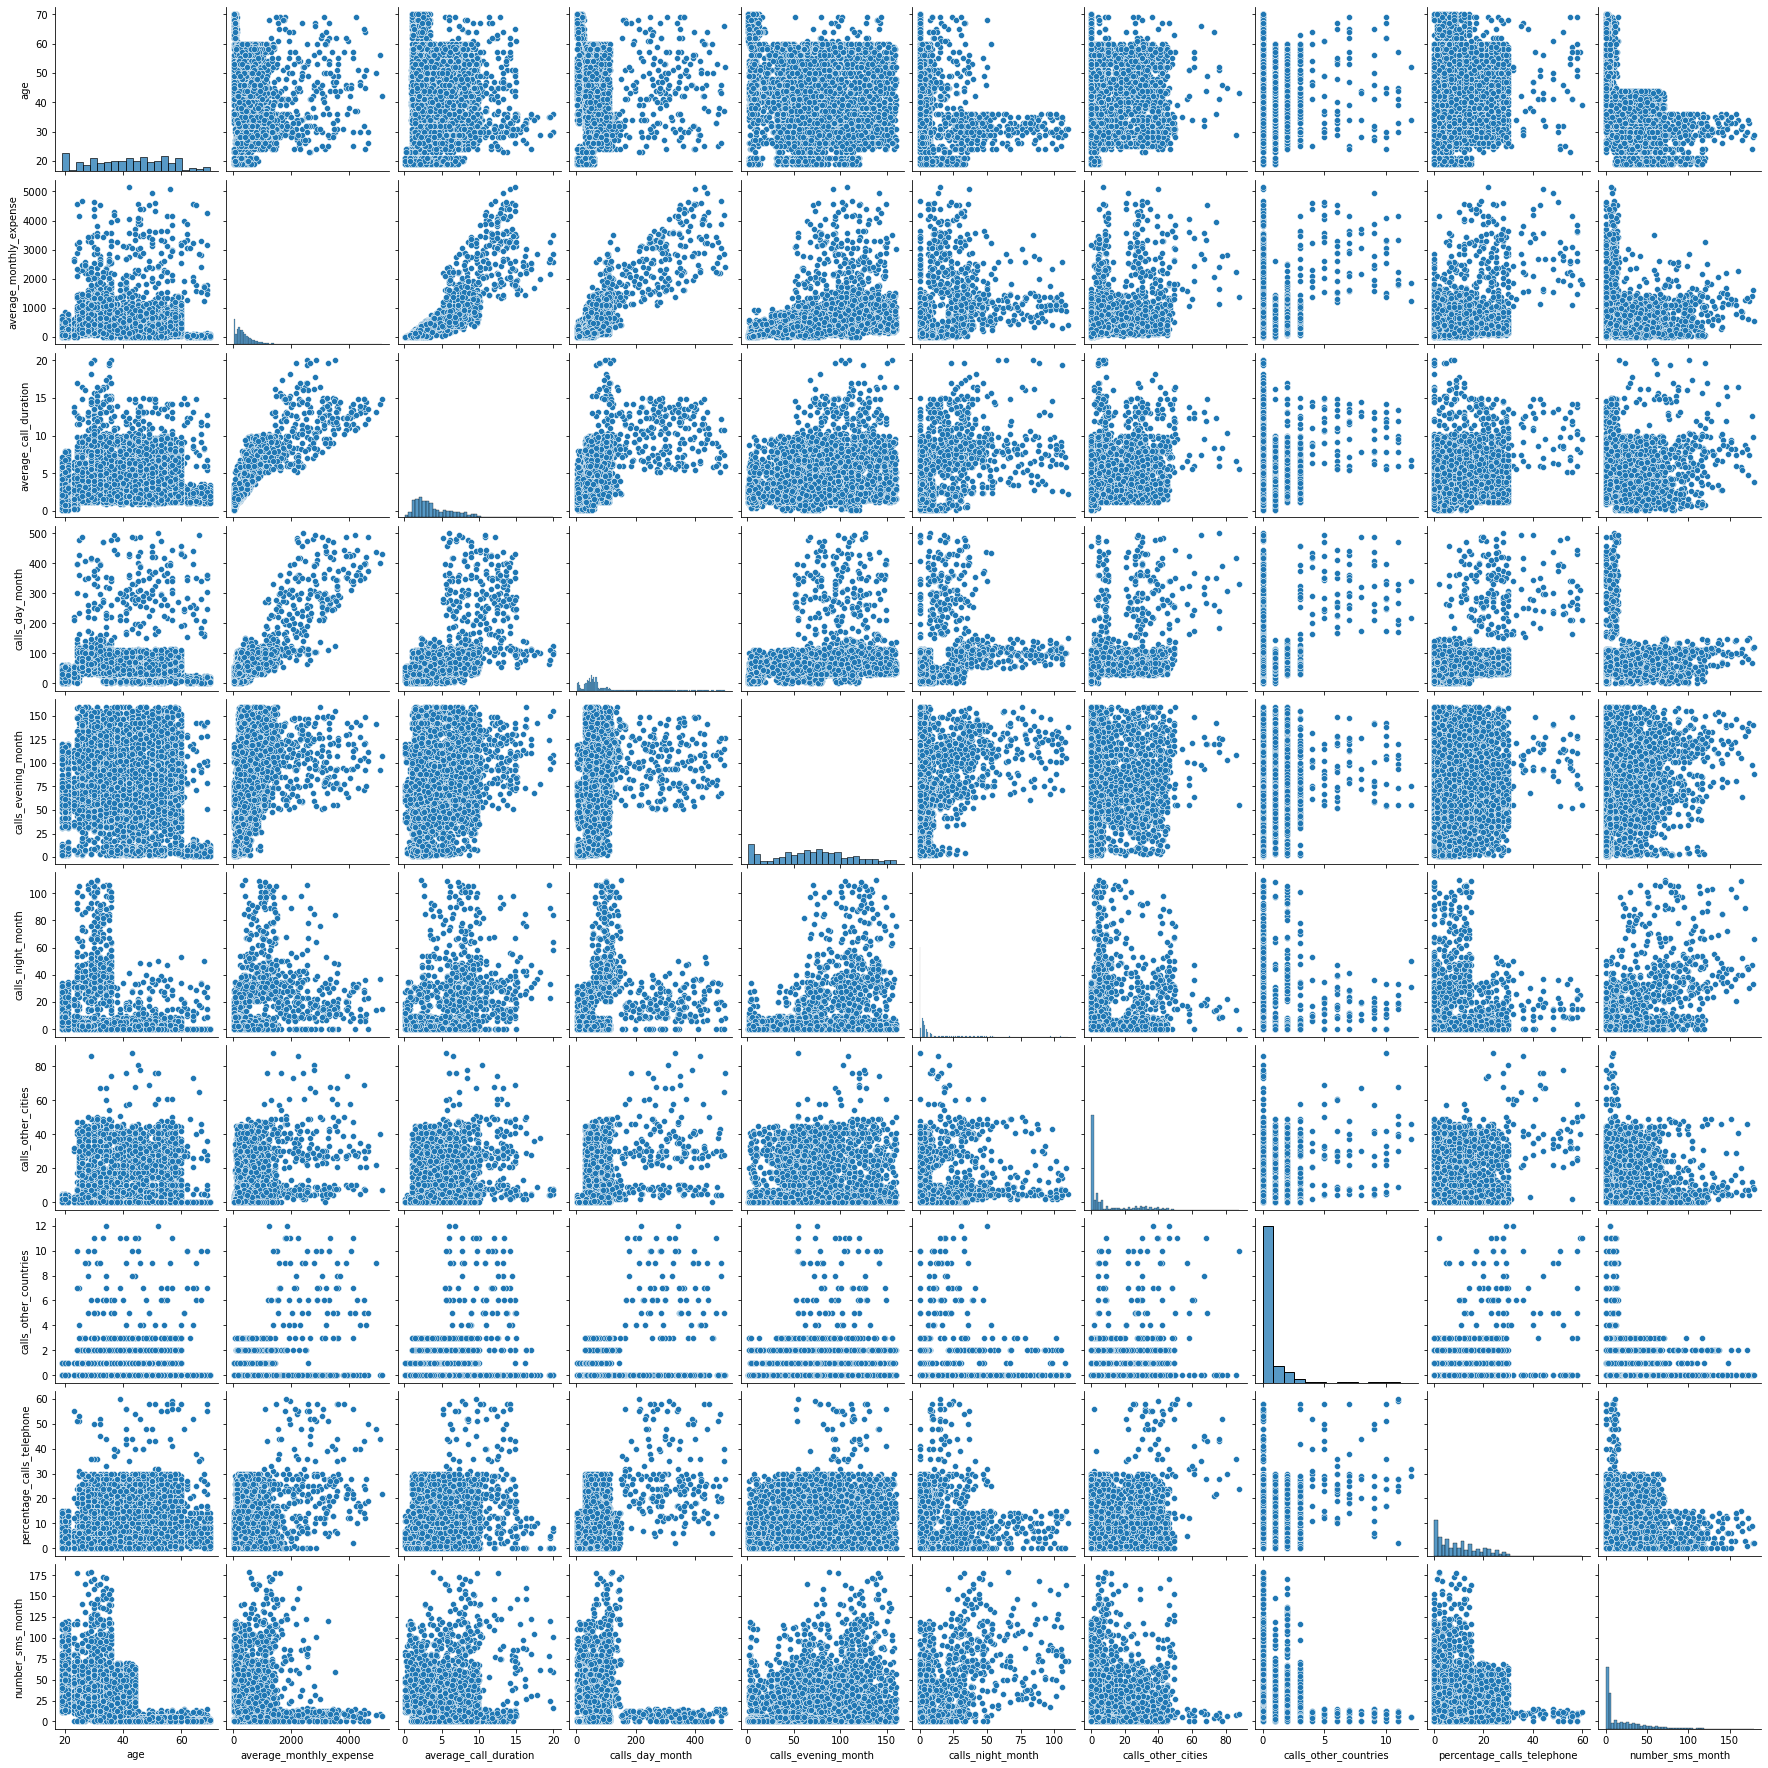

In [23]:
sns.pairplot(data = df)

In [24]:
dict_rename_columns = {
'Возраст' : 'age', 
'Среднемесячный расход' : 'average_monthly_expense',
'Средняя продолжительность разговоров' : 'average_call_duration', 
'Звонков днем за месяц' : 'calls_day_month',
'Звонков вечером за месяц' : 'calls_evening_month', 
'Звонков ночью за месяц' : 'calls_night_month',
'Звонки в другие города' : 'calls_other_cities', 
'Доля звонков на стационарные телефоны' : 'percentage_calls_telephone', 
'Количество SMS за месяц' : 'number_sms_month',
'Звонки в другие страны': 'calls_other_countries'}

### Матрица корреляций

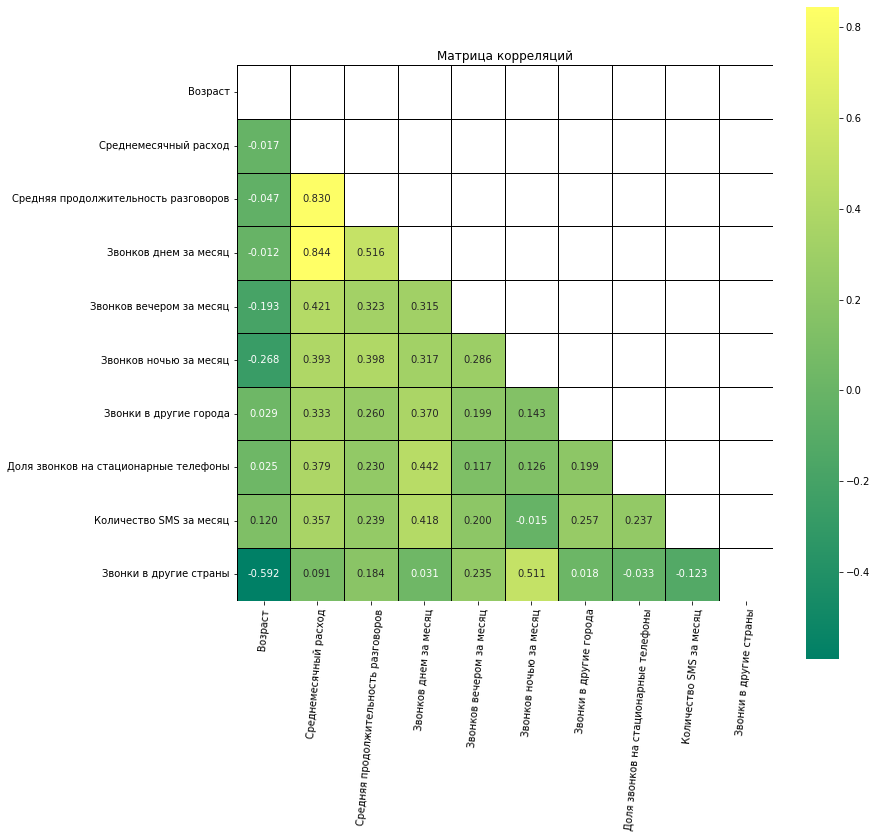

In [25]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(data = df.corr(), annot=True, square=True, 
            cmap='summer', fmt='.3f', linewidths=1, linecolor='black', mask=np.triu(df.corr()))
ax.set_xticklabels(dict_label.values(), rotation = 85)
ax.set_yticklabels(dict_label.values())
plt.title('Матрица корреляций')
plt.show()

### Дискретизация признака `age`

In [26]:
#cut. qcut

In [35]:
df.age.value_counts().sort_index()

AttributeError: 'DataFrame' object has no attribute 'age'

In [28]:
cut_labels_4 = ['студенты', 'аспиранты', 'кандидаты', 'доктора']
cut_bins = [18, 21, 29, 60, 70]

In [34]:
age_disc = pd.cut(df['age'], 
       bins=cut_bins, 
       #labels=cut_labels_4,
       right = True).value_counts()
#age_disc.name = 'age_disc'
age_disc

KeyError: 'age'

In [30]:
df = df.merge(age_disc, 
         left_index = True,
         right_index = True)

In [36]:
df.columns

Index(['age_x', 'average_monthly_expense', 'average_call_duration',
       'calls_day_month', 'calls_evening_month', 'calls_night_month',
       'calls_other_cities', 'calls_other_countries',
       'percentage_calls_telephone', 'number_sms_month', 'age_y'],
      dtype='object')

In [37]:
df

,age_x,average_monthly_expense,average_call_duration,calls_day_month,calls_evening_month,calls_night_month,calls_other_cities,calls_other_countries,percentage_calls_telephone,number_sms_month,age_y


In [33]:
df[['age', 'age_disc']]

KeyError: "None of [Index(['age', 'age_disc'], dtype='object')] are in the [columns]"

In [ ]:
df.groupby('age_disc')[['average_call_duration', 'calls_day_month']].agg(['max', 'min'])

In [ ]:
df.groupby('age_disc')[['calls_other_cities', 'percentage_calls_telephone']].agg(['sum'])